# 1. 데이터 불러오기

In [1]:
# uv add yfinance
import yfinance as yf
from datetime import date, timedelta 
# 날짜 설정하기
year = 5
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=365*year)
print(start_date, end_date)
# 데이터 다운로드 
samsung = yf.download(
    tickers = "005930.KS",
    start = start_date,
    end = end_date
)
samsung.head()

2020-09-09 2025-09-08


C:\Users\user\AppData\Local\Temp\ipykernel_37176\1757766293.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  samsung = yf.download(
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2020-09-09,51407.847656,52200.091884,50879.684838,51231.793383,30597399
2020-09-10,52112.070312,52816.287479,52024.043167,52728.260333,29923293
2020-09-11,51936.011719,52288.120273,51231.794611,52200.093134,16017098
2020-09-14,53168.398438,53520.507036,52728.262689,52992.344138,20648281
2020-09-15,53696.554688,53696.554688,53256.418993,53608.527549,17877075


In [2]:
samsung.columns = samsung.columns.droplevel(1)
samsung.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-09,51407.847656,52200.091884,50879.684838,51231.793383,30597399
2020-09-10,52112.070312,52816.287479,52024.043167,52728.260333,29923293
2020-09-11,51936.011719,52288.120273,51231.794611,52200.093134,16017098
2020-09-14,53168.398438,53520.507036,52728.262689,52992.344138,20648281
2020-09-15,53696.554688,53696.554688,53256.418993,53608.527549,17877075


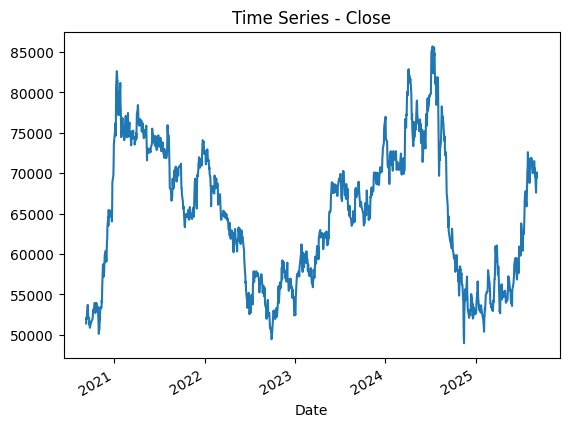

In [3]:
# 데이터 시각화하기
import matplotlib.pyplot as plt 

samsung["Close"].plot()
plt.title("Time Series - Close")
plt.show()

In [4]:
samsung.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-09,51407.847656,52200.091884,50879.684838,51231.793383,30597399
2020-09-10,52112.070312,52816.287479,52024.043167,52728.260333,29923293
2020-09-11,51936.011719,52288.120273,51231.794611,52200.093134,16017098
2020-09-14,53168.398438,53520.507036,52728.262689,52992.344138,20648281
2020-09-15,53696.554688,53696.554688,53256.418993,53608.527549,17877075


In [5]:
# Prophet을 사용하기 위한 데이터 형태
# Columns: ds(날짜), y(Close)
data = samsung.reset_index()[["Date", "Close"]]
data = data.rename(columns={"Date": "ds", "Close": "y"})
data.head()

Price,ds,y
0,2020-09-09,51407.847656
1,2020-09-10,52112.070312
2,2020-09-11,51936.011719
3,2020-09-14,53168.398438
4,2020-09-15,53696.554688


# 2. Prophet

In [6]:
# uv add prophet
from prophet import Prophet 
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet.fit(data)

Importing plotly failed. Interactive plots will not work.
09:47:50 - cmdstanpy - INFO - Chain [1] start processing
09:47:50 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# 향후 1년 예측
result = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(result)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2020-09-09,53952.861136,49410.980167,58439.766501
1,2020-09-10,53748.244832,48981.022430,58293.215252
2,2020-09-11,53525.498712,48866.765345,58057.490013
3,2020-09-14,53093.566164,48490.501920,58000.268578
4,2020-09-15,53105.740939,48447.690138,58296.293386
...,...,...,...,...
1583,2026-09-01,50840.075992,30546.401723,72259.942515
1584,2026-09-02,50520.150994,28905.948058,72996.052777
1585,2026-09-03,50197.740601,28812.723777,71314.155308
1586,2026-09-04,49839.456354,28985.438040,71909.497217


# 3. 시각화

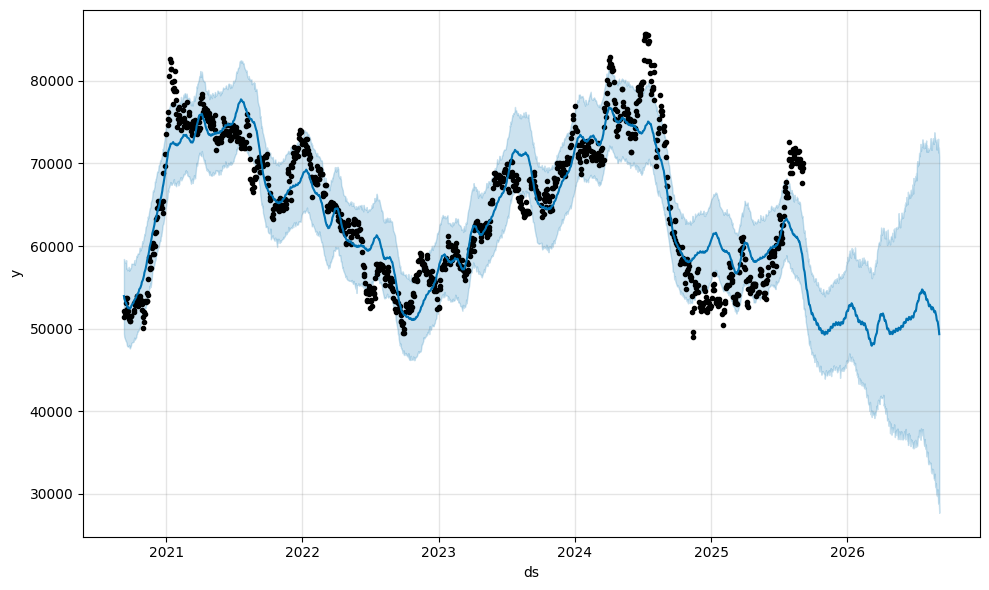

In [8]:
prophet.plot(forecast)
plt.show()

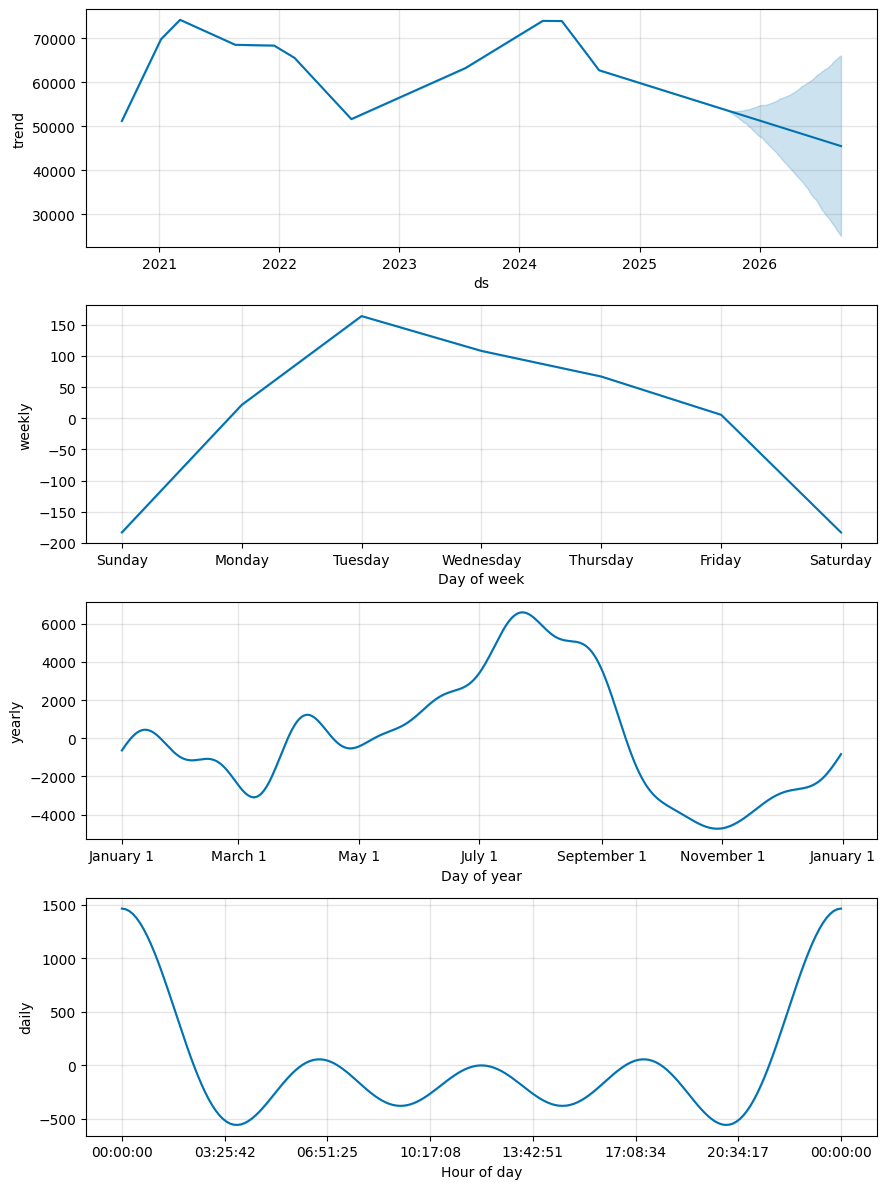

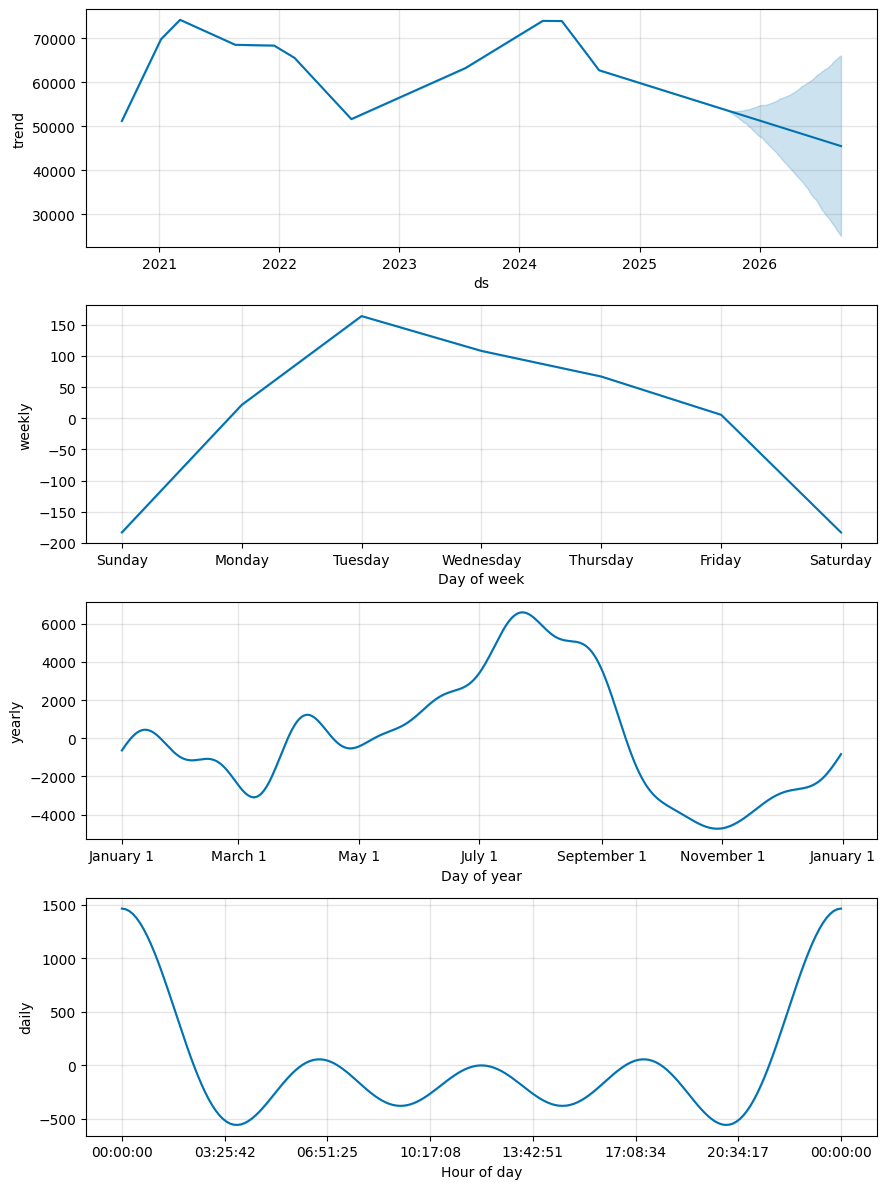

In [ ]:
prophet.plot_components(forecast)

# Yearly seasonality 
# Weekly seasonality 
# Monthly seasonality 
# daily seasonality 

In [11]:
# holiday 설정하기 
from prophet.make_holidays import make_holidays_df 

holidays = make_holidays_df(
    year_list = [2020, 2021, 2022, 2023, 2024],
    country="KR"
)
holidays

,ds,holiday
0,2020-01-01,New Year's Day
1,2020-01-25,Korean New Year
2,2020-01-24,The day preceding Korean New Year
3,2020-01-26,The second day of Korean New Year
4,2020-03-01,Independence Movement Day
...,...,...
87,2024-12-25,Christmas Day
88,2024-04-10,National Assembly Election Day
89,2024-02-12,Alternative holiday for Korean New Year
90,2024-05-06,Alternative holiday for Children's Day
